<table align="center" width=100%>
    <tr>
        <td width="5%">
            <img>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=10px>
                    <b> Statistics Mini Project <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Note - All Statistics tests are conducted @ 5% Significance level 

## `Liabraries`

In [680]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

from statsmodels.stats import proportion
from statsmodels.stats.api import proportions_ztest

from warnings import filterwarnings
filterwarnings(action='ignore')

# `Fifa Dataset`




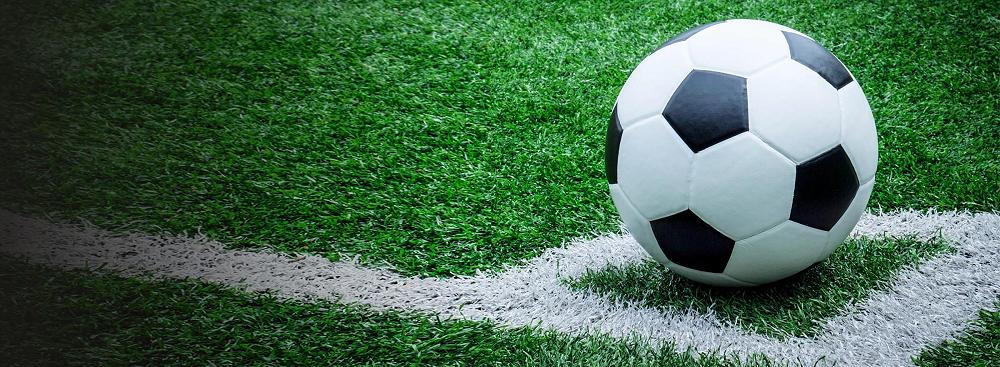


### `Reading Dataset 'Fifa Statistics'`

In [512]:
df1 = pd.read_csv("fifa_stats.csv")
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [678]:
print(df1.columns.tolist())

['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height', 'Weight']


# `Exploratory Data Analysis`

## `Attributes`

## `Name - Name of the player`
## `Age  - Age of the player in years`
## `Nationality - A country which the player represents`

## `Overall-Rating (OVR)`

In [514]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Overall_Rating.png", width=700, height=300)

## `Potential Ability`

In [515]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Potential Ability.png", width=700, height=300)

## `Club`
### Name of the Club from which player belongs to

## `Preferred Foot - `
### The foot, which the player strong at

## `International Reputation - `

### Scale of 1-5 which represents the popularity of a player at international level

## `Weak Foot`

In [516]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Weak_Foot.png", width=700, height=300)

## `Skill Moves`

### Skill Moves range from 1-Star to 5-Star, and the higher the Skill Move rating, the more tricks a player can do.

## `Work Rate`

In [517]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Work_Rate.png", width=700, height=300)

## `Position`

In [518]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Soccer_Large-13.jpg", width=500, height=800)

## `Jersey Number`













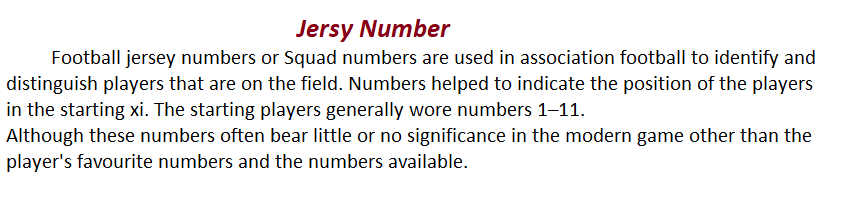

## `Height `

### Height of player in feet

## `Weight `

### weight of player in pounds

In [519]:
null = df1.isnull().sum()
print(null,"\n")
print(f"The Attribute having null values is {null.idxmax()} : {null.max()}")

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64 

The Attribute having null values is Club : 19


### `Removing null values in attribute 'Club'`

In [520]:
df1 = df1[df1.Club.notnull()]

In [521]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      1981 non-null   object 
 1   Age                       1981 non-null   int64  
 2   Nationality               1981 non-null   object 
 3   Overall_rating            1981 non-null   int64  
 4   Potential                 1981 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            1981 non-null   object 
 7   International Reputation  1981 non-null   int64  
 8   Weak Foot                 1981 non-null   int64  
 9   Skill Moves               1981 non-null   int64  
 10  Work Rate                 1981 non-null   object 
 11  Position                  1981 non-null   object 
 12  Jersey Number             1981 non-null   int64  
 13  Height                    1981 non-null   float64
 14  Weight  

In [522]:
df1.nunique().sort_values(ascending=True)

Preferred Foot                 2
International Reputation       5
Weak Foot                      5
Skill Moves                    5
Work Rate                      8
Height                        17
Overall_rating                19
Potential                     21
Age                           23
Position                      27
Weight                        47
Jersey Number                 67
Nationality                   95
Club                         285
Name                        1951
dtype: int64

In [523]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1981.0,27.215548,3.852519,17.000000,24.0,27.0,30.000000,40.000000
Overall_rating,1981.0,78.212014,3.293624,75.000000,76.0,77.0,80.000000,94.000000
Potential,1981.0,80.328117,4.118002,75.000000,77.0,80.0,83.000000,95.000000
International Reputation,1981.0,1.777890,0.812861,1.000000,1.0,2.0,2.000000,5.000000
Weak Foot,1981.0,3.202928,0.730443,1.000000,3.0,3.0,4.000000,5.000000
Skill Moves,1981.0,2.920242,0.964888,1.000000,2.0,3.0,4.000000,5.000000
Jersey Number,1981.0,15.253407,13.247428,1.000000,7.0,13.0,20.000000,99.000000
Height,1981.0,5.781886,0.442515,5.083333,5.5,6.0,6.166667,6.583333
Weight,1981.0,169.483089,16.053960,123.000000,159.0,170.0,181.000000,227.000000


In [524]:
df1['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium'],
      dtype=object)

In [525]:
df1['International Reputation'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [526]:
df1['Weak Foot'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [527]:
df1['Skill Moves'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

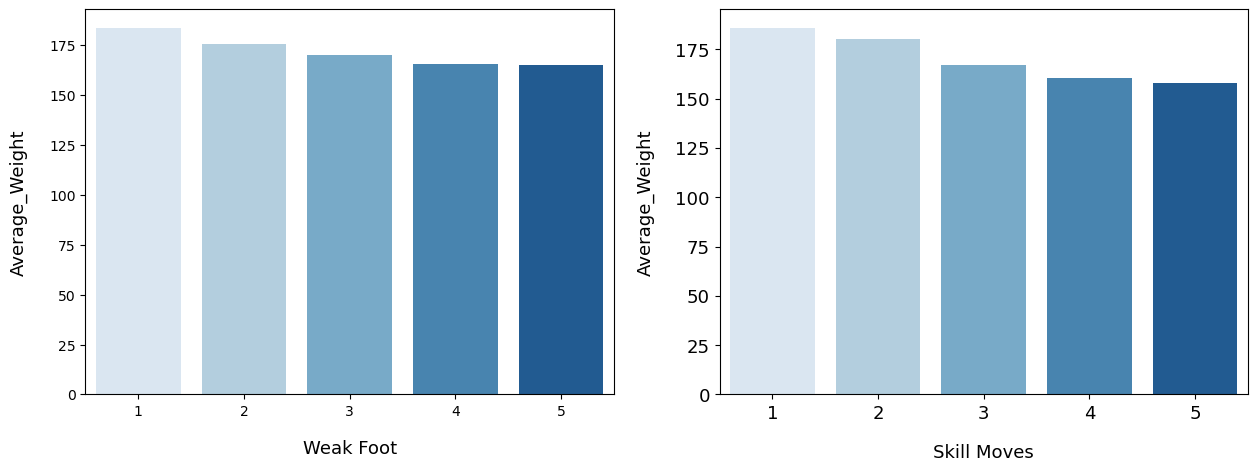

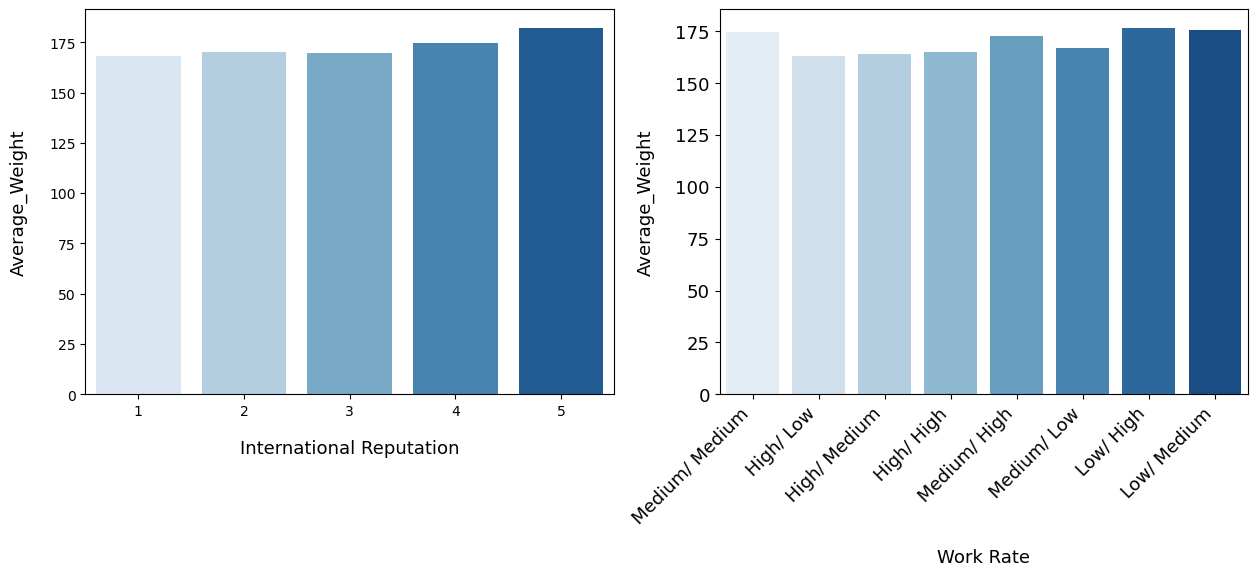

In [528]:
col = ['Weak Foot','Skill Moves','International Reputation','Work Rate']

for i in range(0,len(col),2):
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    for k,l in enumerate(axes):
        ax = sns.barplot(data=df1,x=col[i+k],y='Weight',ax=l,ci=0,palette='Blues')
        ax.set_xlabel(ax.get_xlabel(),fontsize=13,labelpad=15)
        ax.set_ylabel("Average_"+ax.get_ylabel(),fontsize=13,labelpad=15)
        plt.tick_params(axis='x',labelsize=13)
        plt.tick_params(axis='y',labelsize=13)
        if df1[col[i+k]].dtypes == 'O':
            plt.xticks(rotation=45,horizontalalignment='right')
    plt.show()

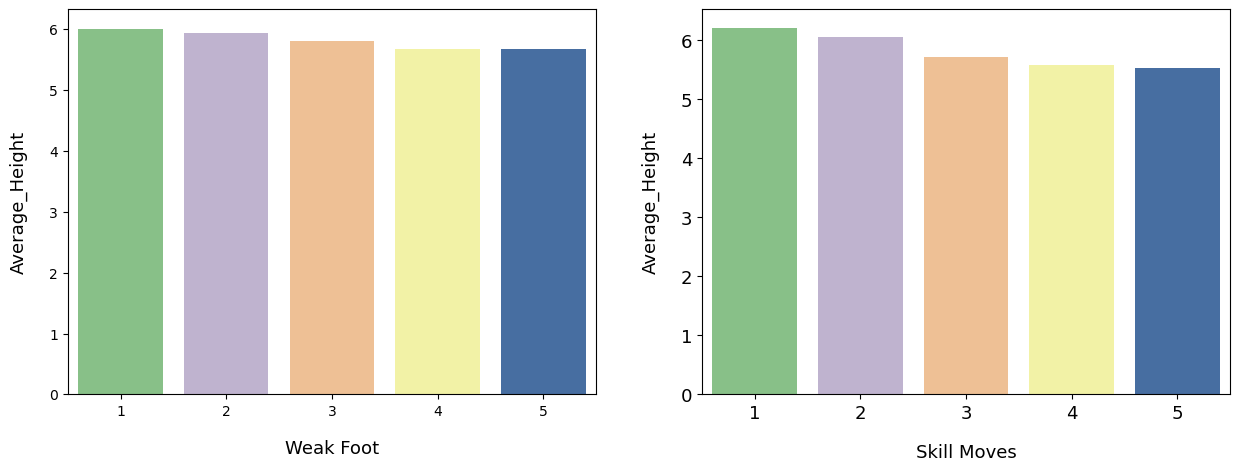

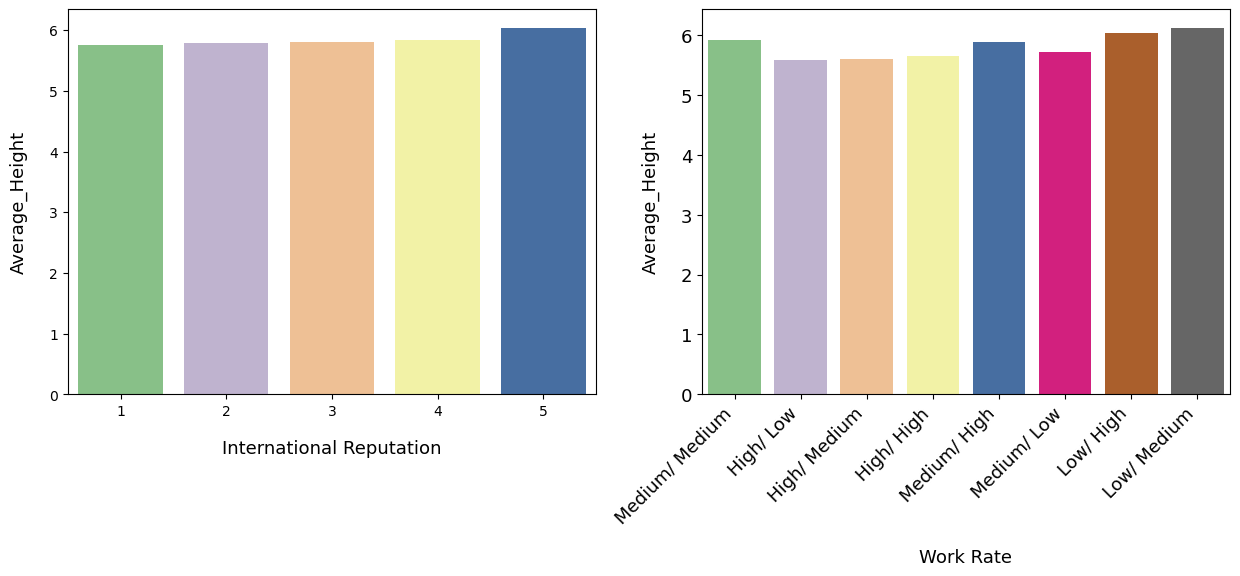

In [529]:
col = ['Weak Foot','Skill Moves','International Reputation','Work Rate']

for i in range(0,len(col),2):
    fig,axes = plt.subplots(1,2,figsize=(15,5))
    for k,l in enumerate(axes):
        ax = sns.barplot(data=df1,x=col[i+k],y='Height',ax=l,ci=0,palette='Accent')
        ax.set_xlabel(ax.get_xlabel(),fontsize=13,labelpad=15)
        ax.set_ylabel("Average_"+ax.get_ylabel(),fontsize=13,labelpad=15)
        plt.tick_params(axis='x',labelsize=13)
        plt.tick_params(axis='y',labelsize=13)
        if df1[col[i+k]].dtypes == 'O':
            plt.xticks(rotation=45,horizontalalignment='right')
    plt.show()

In [530]:
Position = df1['Position'].unique().tolist()
Abbrevations = ['Right Forward','Striker','Left Winger','Goal Keeper','Right Central Midfielder','Left Forward','Right Striker','Right Centre back',
'Left Central Midfielder','Centre Back','left Defensive Midfielder','Centre Defensive Midfielder','Right Defensive Midfielder',
'Left Striker','Left Centre back','Right Midfielder','Left Attacking Midfielder','Left Midfielder','Left Back','Right Defensive Midfielder',
'Right Winger','Central Midfielder','Right Back','Right Attacking Midfielder','Central Forward','Right winger Back',
'Left Winger Back']

In [694]:
Abbrevations = [position.replace(" ","_") for position in Abbrevations]

In [696]:
position_df = pd.DataFrame({'Position':Position,'Abbrevations':Abbrevations})
position_df

,Position,Abbrevations
0,RF,Right_Forward
1,ST,Striker
2,LW,Left_Winger
3,GK,Goal_Keeper
4,RCM,Right_Central_Midfielder
5,LF,Left_Forward
6,RS,Right_Striker
7,RCB,Right_Centre_back
8,LCM,Left_Central_Midfielder
9,CB,Centre_Back


In [698]:
position_dict = {i:j for i,j in position_df.set_index('Position')['Abbrevations'].items()}

series = df1['Position'].map(position_dict)

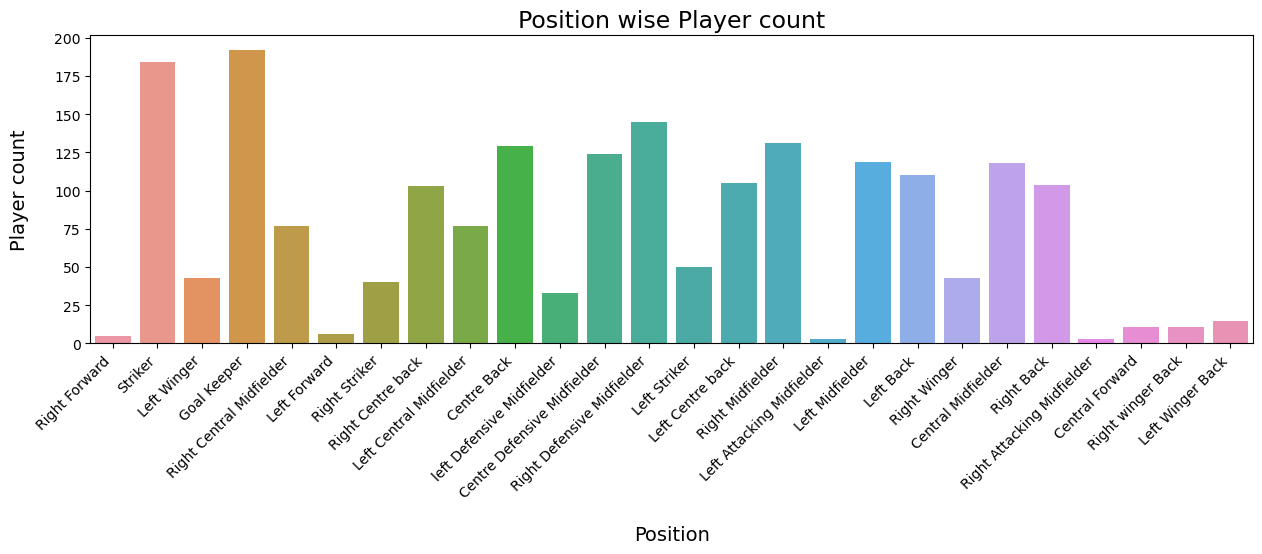

In [534]:
fig,ax = plt.subplots(figsize=(15,4))

ax = sns.countplot(series,x='Position')
ax.xaxis.set_ticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':14},labelpad=18)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':14},labelpad=18)
plt.title("Position wise Player count",fontdict={'size':17})
plt.show()

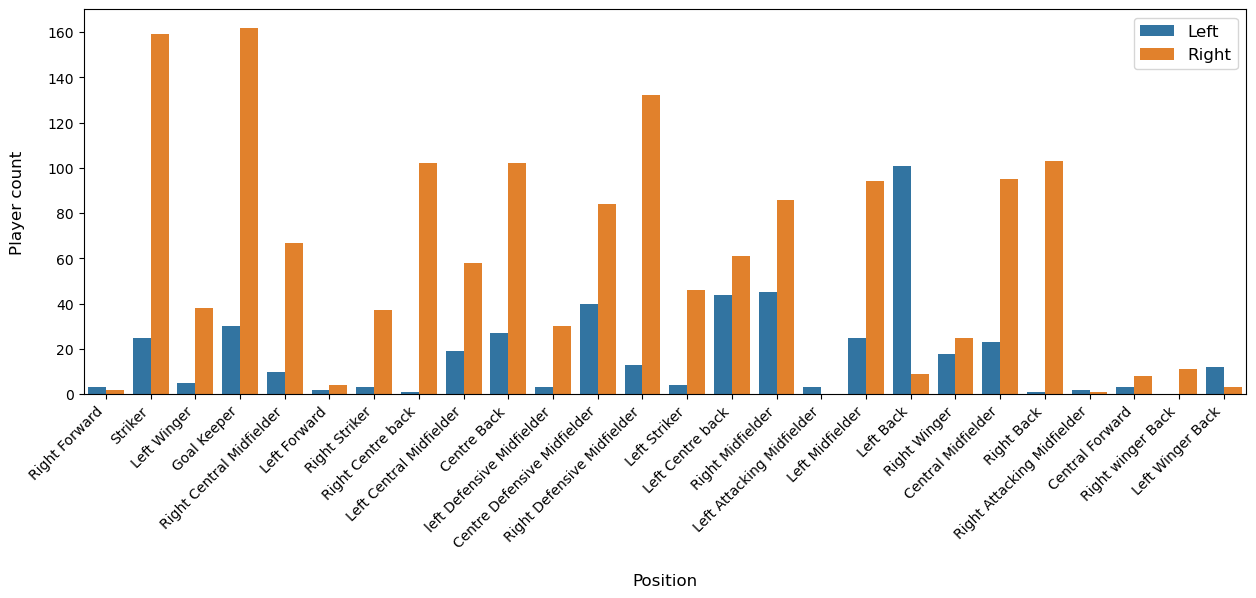

In [535]:
fig,ax = plt.subplots(figsize=(15,5))

sns.countplot(series,x='Position',hue=df1['Preferred Foot'])
ax.xaxis.set_ticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':12},labelpad=16)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':12},labelpad=16)
ax.legend(fontsize = 12,loc='upper right')
plt.show()

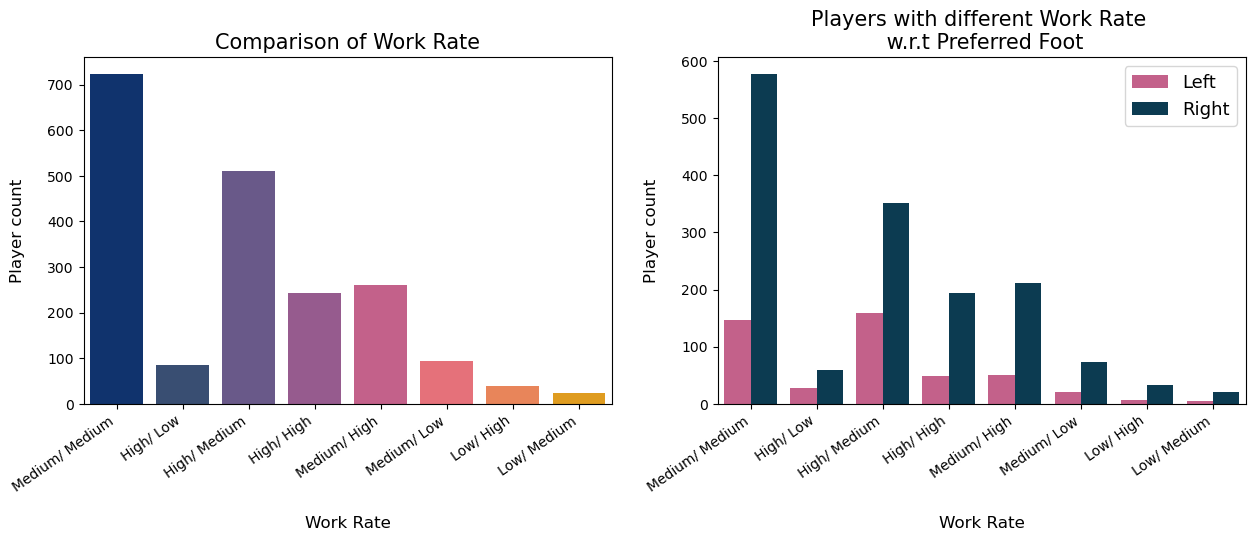

In [536]:
fig,ax = plt.subplots(1,2,figsize=(15,4.5))

plt.subplot(121)
palette = ['#002f7c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
ax = sns.countplot(df1['Work Rate'],x='Position',palette=palette)
ax.xaxis.set_ticklabels(ax.get_xticklabels(),rotation=35,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':12},labelpad=16)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':12},labelpad=16)
plt.title("Comparison of Work Rate",fontdict={'size':15})

plt.subplot(122)
palette = ['#d45087','#003f5c']
ax = sns.countplot(df1['Work Rate'],x='Position',palette=palette,hue=df1['Preferred Foot'])
ax.xaxis.set_ticklabels(ax.get_xticklabels(),rotation=35,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':12},labelpad=16)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':12},labelpad=16)
plt.title("Players with different Work Rate \n w.r.t Preferred Foot",fontdict={'size':15})
ax.legend(fontsize = 13)

plt.show()

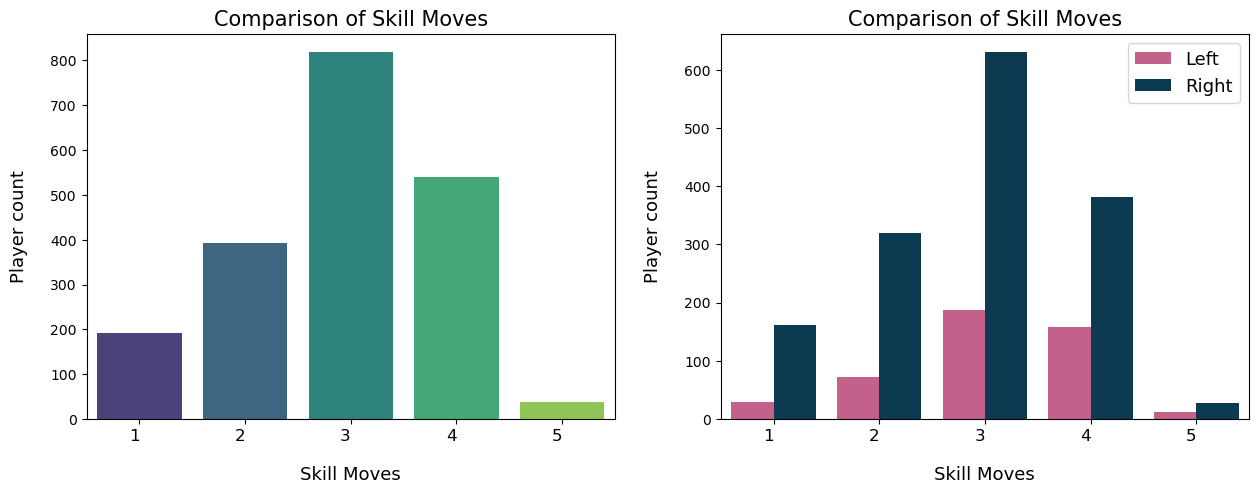

In [537]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
palette = ['#d45087','#003f5c']

plt.subplot(121)
ax = sns.countplot(df1['Skill Moves'],x='Position',palette='viridis')
ax.xaxis.set_ticklabels(ax.get_xticklabels(),fontsize=12,rotation=0,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':13},labelpad=16)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':13},labelpad=16)
plt.title("Comparison of Skill Moves",fontdict={'size':15})

plt.subplot(122)
ax = sns.countplot(df1['Skill Moves'],x='Position',palette=palette,hue=df1['Preferred Foot'])
ax.xaxis.set_ticklabels(ax.get_xticklabels(),fontsize=12,rotation=0,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':13},labelpad=16)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':13},labelpad=16)
plt.title("Comparison of Skill Moves",fontdict={'size':15})
ax.legend(fontsize = 13)

plt.show()

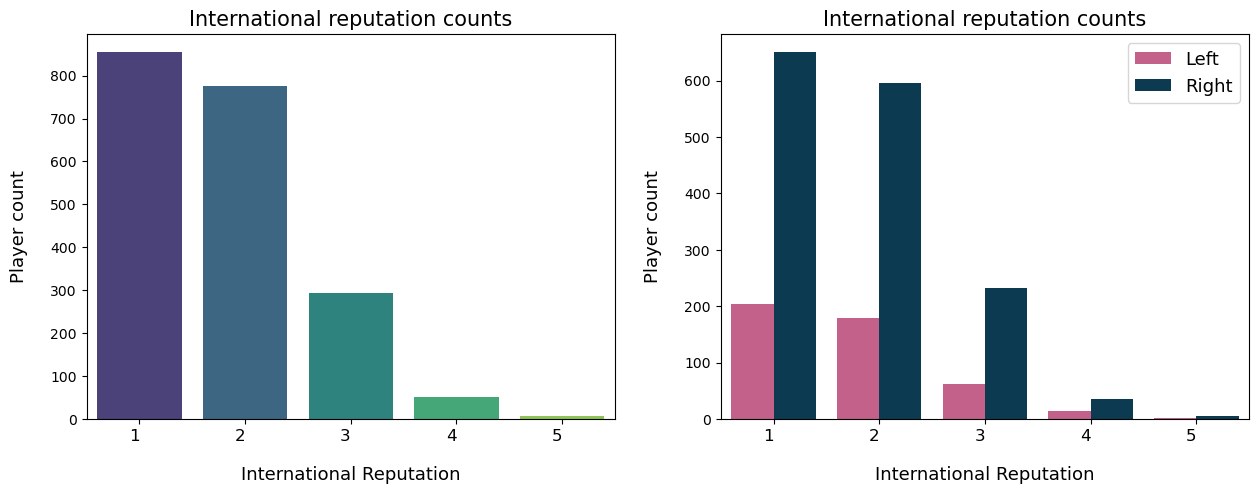

In [538]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
palette = ['#d45087','#003f5c']

plt.subplot(121)
ax = sns.countplot(df1['International Reputation'],x='Position',palette='viridis')
ax.xaxis.set_ticklabels(ax.get_xticklabels(),fontsize=12,rotation=0,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':13},labelpad=16)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':13},labelpad=16)
plt.title("International reputation counts",fontdict={'size':15})

plt.subplot(122)
ax = sns.countplot(df1['International Reputation'],x='Position',palette=palette,hue=df1['Preferred Foot'])
ax.xaxis.set_ticklabels(ax.get_xticklabels(),fontsize=12,rotation=0,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':13},labelpad=16)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':13},labelpad=16)
plt.title("International reputation counts",fontdict={'size':15})
ax.legend(fontsize = 13)
plt.show()

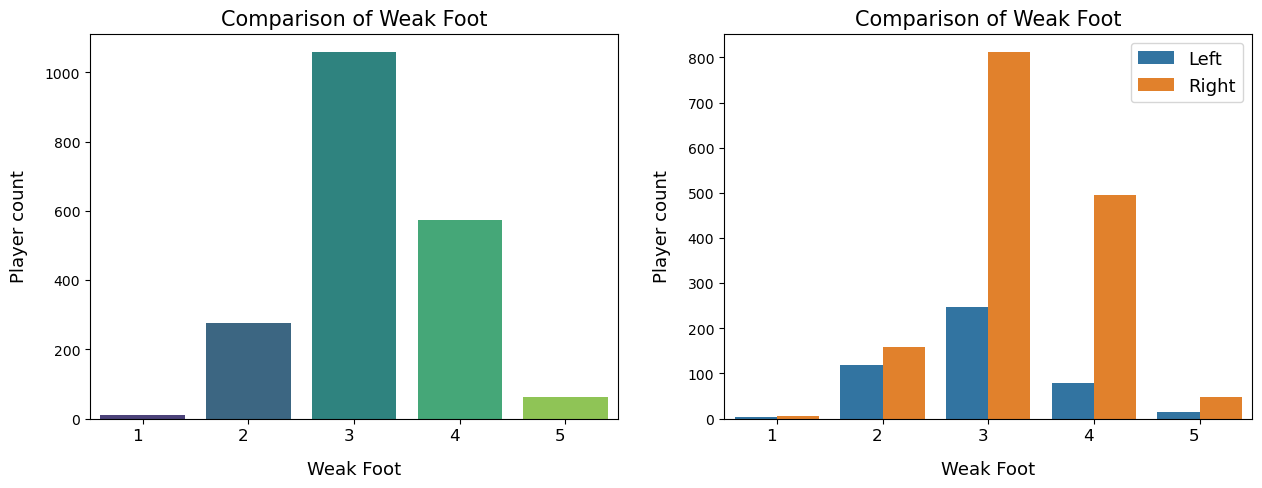

In [539]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
ax = sns.countplot(df1['Weak Foot'],x='Position',palette='viridis')
ax.xaxis.set_ticklabels(ax.get_xticklabels(),fontsize=12,rotation=0,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':13},labelpad=12)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':13},labelpad=12)
plt.title("Comparison of Weak Foot",fontdict={'size':15})

plt.subplot(122)
ax = sns.countplot(df1['Weak Foot'],x='Position',hue=df1['Preferred Foot'])
ax.xaxis.set_ticklabels(ax.get_xticklabels(),fontsize=12,rotation=0,horizontalalignment='right')
ax.set_xlabel(ax.get_xlabel(),fontdict={'size':13},labelpad=12)
ax.set_ylabel("Player "+ax.get_ylabel(),fontdict={'size':13},labelpad=12)
plt.title("Comparison of Weak Foot",fontdict={'size':15})
ax.legend(fontsize = 13)
plt.show()

In [27]:
df1['Preferred Foot'].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [509]:
print(df1['Position'].value_counts().to_dict())

{'GK': 192, 'ST': 184, 'RM': 131, 'CB': 129, 'CAM': 124, 'LM': 119, 'CM': 118, 'LB': 110, 'LCB': 105, 'RB': 104, 'RCB': 103, 'CDM': 97, 'RCM': 77, 'LCM': 77, 'LS': 50, 'RDM': 48, 'RW': 43, 'LW': 43, 'RS': 40, 'LDM': 33, 'LWB': 15, 'CF': 11, 'RWB': 11, 'LF': 6, 'RF': 5, 'LAM': 3, 'RAM': 3}


In [540]:
# Dataframe with removed null values from 'Club' column
 
df1 = df1[df1.Club.notna()]

df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [541]:
corr = df1.corr().where((np.tril(np.ones(df1.corr().shape),k=-1).astype(bool)))
corr

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall_rating,0.065415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Potential,-0.511813,0.732086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International Reputation,0.317207,0.661631,0.326561,NaN,NaN,NaN,NaN,NaN,NaN
Weak Foot,-0.060779,0.104497,0.099751,0.105721,NaN,NaN,NaN,NaN,NaN
Skill Moves,-0.203928,0.083036,0.127850,0.088159,0.342575,NaN,NaN,NaN,NaN
Jersey Number,-0.036914,-0.096322,-0.039918,-0.033793,0.040300,0.064169,NaN,NaN,NaN
Height,0.069289,0.041389,0.029916,0.044504,-0.188258,-0.474081,0.003525,NaN,NaN
Weight,0.149615,0.054398,-0.017479,0.070266,-0.199720,-0.529191,-0.016596,0.545304,NaN


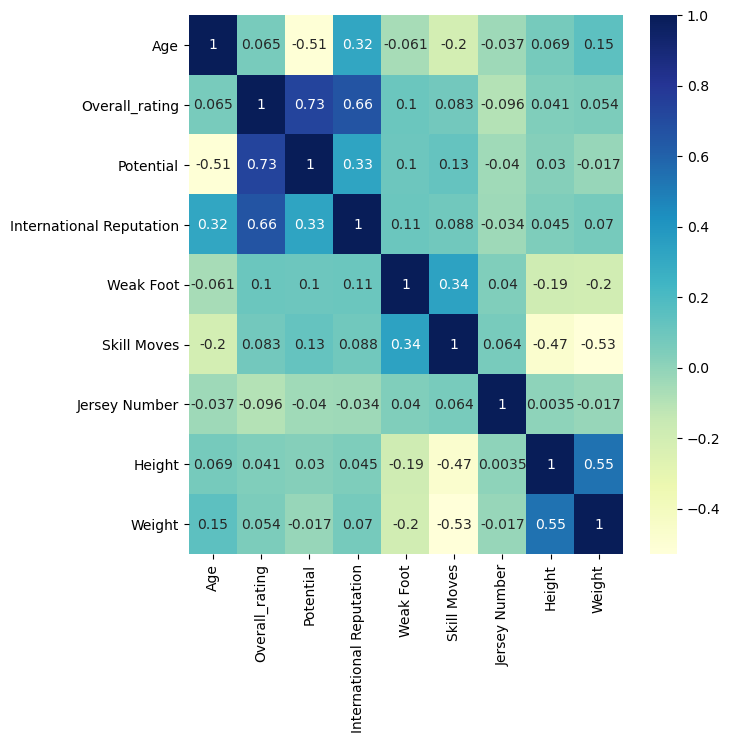

In [542]:
plt.figure(figsize=(7,7))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [553]:
def Correlated_features(corr_matrix,threshold=0):
    # Constructing lower triangular matrix, making all repeated values in upper triangular portion as null
    # Also excluding diagonal values, which represents correlation coeff of feature with itself
    
    corr = corr_matrix.where((np.tril(np.ones(corr_matrix.corr().shape),k=-1).astype(bool)))
    
    # Function to filter only values which are less than threshold or greater than absolute value of threshold
    function = lambda items : ((items[2] > pos_threshold)|(items[2] < neg_threshold))
    
    # Condition check
    if threshold !=0:
        pos_threshold = threshold
        neg_threshold = -1*(threshold)
    else:
        # Extracting all coefficients of a feature with respect to other features
        pos_threshold = neg_threshold = 0
    if (threshold >= 0) & (corr_matrix.shape[0] == corr_matrix.shape[1]):
        for num,column in enumerate(corr.columns):
            
            # Iterating through each series of correlation 
            data = list(filter(function,[(column,)+i for i in corr[column].items()]))
            if num == 0:
                dataframe = pd.DataFrame(data,columns=['feature1','feature2','correlation_coeff'])
            else:
                dataframe_temp = pd.DataFrame(data,columns=['feature1','feature2','correlation_coeff'])
                dataframe = dataframe.append(dataframe_temp,ignore_index=True)
        return dataframe
    else:  
        return "Pass appropriate arguments"

In [554]:
# Correlated features which are greater than 0.7 or less than -0.7

features = Correlated_features(df1.corr(),threshold=0.7)
features

,feature1,feature2,correlation_coeff
0,Overall_rating,Potential,0.732086


### Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [555]:
# Drawing 50 samples of size = 200 (>30)
# Function to take samples and calculate mean of each sample
# which returns list of sample means and 

def sample_means_Age(Series,samples=50,size=200):
    """returns tuple of
    1) Actual Mean of Series
    2) Mean of sampling distribution of means
    3) Standard Error of sampling distribution
    """
    xbars = []
    for i in range(samples):
        avg = Series.sample(n=size).mean()
        xbars.append(avg)
        mean_of_xbars = sum(xbars)/samples
        s_error = np.std(xbars)/np.sqrt(samples)
        actual_mean = Series.mean()
    return xbars,actual_mean,mean_of_xbars,s_error

### `sample size = 200`

In [556]:
# Central limit theorem - Taking sufficiently large number of samples,
# Sampling distribution of sample means follow Normal distribution 
# with Mean (Mu) and variance (sigma^2)/square(n)

# With sample size = 200

xbars_200,pop_mean,mean_of_xbars_200,std_error_200 = sample_means_Age(df1['Age'],size=200)
pop_mean,mean_of_xbars_200,std_error_200

(27.215547703180214, 27.1277, 0.039803318957091986)

In [557]:
print(f"The population mean is : {pop_mean}")
print(f"The Mean of Distribution of sample_means is : {mean_of_xbars_200:0.5f}")
print(f"Standard Error : {std_error_200:0.5f}")

The population mean is : 27.215547703180214
The Mean of Distribution of sample_means is : 27.12770
Standard Error : 0.03980


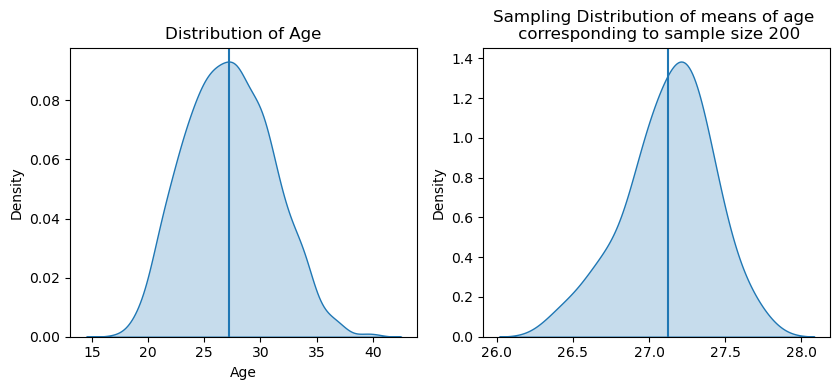

In [558]:
fig,ax = plt.subplots(1,2,figsize=(8.5,4))

plt.subplot(121)
sns.kdeplot(df1['Age'],fill=True)
plt.axvline(x = df1['Age'].mean())
plt.title("Distribution of Age")

plt.subplot(122)
sns.kdeplot(xbars_200,fill=True)
plt.axvline(x = mean_of_xbars_200)
plt.title("Sampling Distribution of means of age \n corresponding to sample size 200")

plt.tight_layout()
plt.show()

### `Increasing to sample size = 300`

In [559]:
# As the sample size increases, Standard Error will decrease
# With sample size = 300

xbars_300,pop_mean,mean_of_xbars_300,std_error_300 = sample_means_Age(df1['Age'],size=300)

In [560]:
print(f"The population mean is : {pop_mean}")
print(f"The Mean of Distribution of sample_means is : {mean_of_xbars_300:0.5f}")
print(f"Standard Error : {std_error_300:0.5f}")

The population mean is : 27.215547703180214
The Mean of Distribution of sample_means is : 27.22147
Standard Error : 0.03088


In [561]:
print(f"Standard Error corresponding to sample size=200 : {std_error_200:0.5f}")
print(f"Standard Error corresponding to sample size=300 : {std_error_300:0.5f}")
('Std_Error_300 > Std_Error_200','Std_Error_300 < Std_Error_200')[bool(std_error_200 > std_error_300)]

Standard Error corresponding to sample size=200 : 0.03980
Standard Error corresponding to sample size=300 : 0.03088


'Std_Error_300 < Std_Error_200'

In [562]:
# We can conclude that by increasing the number samples,Standard error will decrease thereby 
# increasing the proximity towards population mean

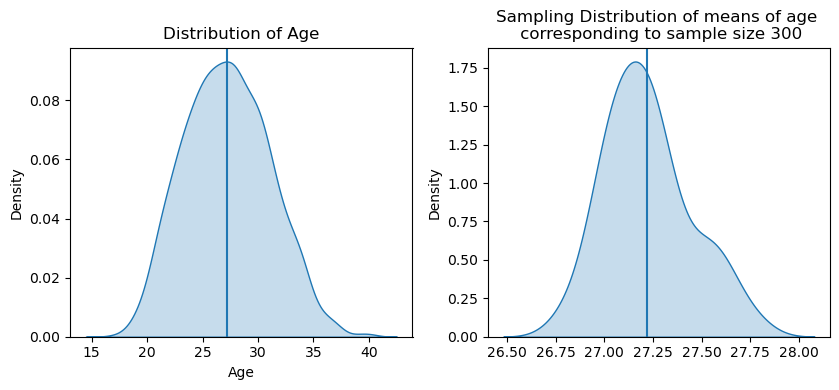

In [563]:
fig,ax = plt.subplots(1,2,figsize=(8.5,4))

plt.subplot(121)
sns.kdeplot(df1['Age'],fill=True)
plt.axvline(x = df1['Age'].mean())
plt.title("Distribution of Age")

plt.subplot(122)
sns.kdeplot(xbars_300,fill=True)
plt.axvline(x = mean_of_xbars_300)
plt.title("Sampling Distribution of means of age \n corresponding to sample size 300")

plt.tight_layout()
plt.show()

## <font color = 'green'>Is there any evidence that the players overall rating is greater than 80 ?</font>

### `1) Assumption for Normality - shapiro-wilk test`
### `2) Assumption for Equality of population variance - Lavene test`

In [51]:
# 1) Shapiro-Wilk Test

# H0 : Data is normally distributed
# H1 : Data is not normally distributed

Test_stats,p_value = stats.shapiro(df1['Age'])

In [50]:
Normality = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}
Normality[p_value < 0.05]

'p-value(1.2290930426206437e-11) < 0.05, Reject Null hypothesis'

### `Normality assumption is not satisfied`

### `since number of samples > 30, according Central limit theorem`

### `sampling distribution approximates to normality`

In [569]:
# Random variable X ~ 'Overall Rating of Football clubs'
# Assuming 5% significance level, conducting 1 sample z-test of mean, Right tailed Test

# Mu0 = Average Overall rating = 80

# H0 : Mu <= 80
# H1 : Mu > 80

# Decision making : If Z_stat > Z_critical reject null hypothesis @ 5% significance level

xbar = df1['Overall_rating'].mean()
Mean = 80
alpha = 0.05
std_error = np.std(df1['Overall_rating'])/np.sqrt(len(df1['Overall_rating']))
Z_critical = stats.norm.isf(alpha)
Z_stat = (xbar-Mean)/std_error
print(f"Z_stat : {Z_stat:0.5f}")
print(f"Z_critical : {Z_critical:0.5f}")

print({True : "Reject Null Hypithesis, Statistically Significant",False : "Fail to reject Null hypothesis"}[Z_stat > Z_critical])

Z_stat : -24.16807
Z_critical : 1.64485
Fail to reject Null hypothesis


In [ ]:
ztest()

In [574]:
from statsmodels.stats.weightstats import ztest

test_stat,p_value = ztest(df1['Overall_rating'],value=80,alternative='larger')

Decision = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}

Decision[p_value < 0.05]

'p-value(1.0) > 0.05, Failed to reject Null hypothesis'

In [565]:
# There is not enough evidence against the Null hypothesis that overall rating is equal to 80"

# Hence Average Overall Rating greater equal 80

## <font color ='green'>Statistical test to identify whether preferred foot has any impact on potential.</font>
## <font color ='green'>Also, performing the graphical analysis</font>

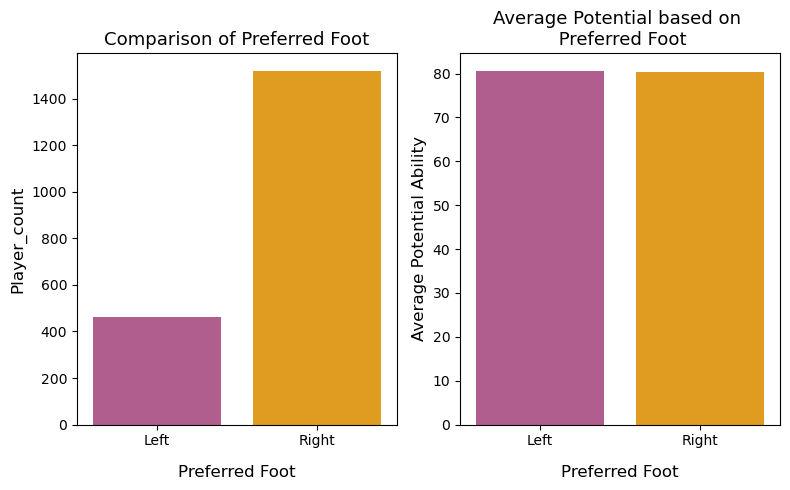

In [600]:
palette = ['#bc5090','#ffa600']

fig,ax = plt.subplots(1,2,figsize=(8,5))

plt.subplot(121)
sns.countplot(df1['Preferred Foot'],x='Preferred Foot',palette=palette)
plt.xlabel('Preferred Foot',fontdict={'size':12},labelpad=12)
plt.ylabel("Player_count",fontdict={'size':12})
plt.title("Comparison of Preferred Foot",fontdict={'size':13})

plt.subplot(122)

sns.barplot(x=df1['Preferred Foot'],y=df1['Potential'],palette=palette,ci=0)
plt.xlabel('Preferred Foot',fontdict={'size':12},labelpad=12)
plt.ylabel("Average Potential Ability",fontdict={'size':12})
plt.title("Average Potential based on \n Preferred Foot",fontdict={'size':13})

plt.tight_layout(h_pad=12)
plt.show()    

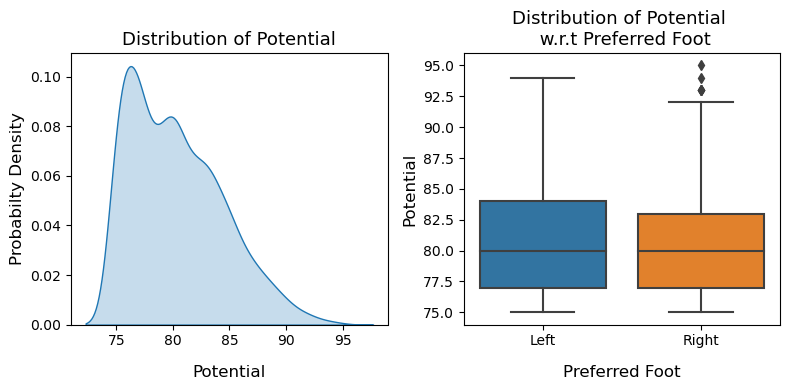

In [599]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

plt.subplot(122)
sns.boxplot(data=df1,x='Preferred Foot',y='Potential')
plt.xlabel('Preferred Foot',fontdict={'size':12},labelpad=12)
plt.ylabel("Potential",fontdict={'size':12})
plt.title("Distribution of Potential \n w.r.t Preferred Foot",fontdict={'size':13})

plt.subplot(121)
sns.kdeplot(data=df1,x='Potential',fill=True)
plt.xlabel('Potential',fontdict={'size':12},labelpad=12)
plt.ylabel("Probabilty Density",fontdict={'size':12})
plt.title("Distribution of Potential",fontdict={'size':13})

plt.tight_layout()

plt.show()

In [589]:
df1.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [590]:
foot_potential = df1[['Preferred Foot','Potential']]
foot_potential.head()

,Preferred Foot,Potential
0,Left,94
1,Right,94
2,Right,93
3,Right,93
4,Right,92


In [591]:
# No_Null values

foot_potential.isnull().sum()

Preferred Foot    0
Potential         0
dtype: int64

### `Checking Assumptions for One-way Annova`

In [592]:
left = foot_potential[foot_potential['Preferred Foot'] == 'Left']['Potential']
Right = foot_potential[foot_potential['Preferred Foot'] == 'Right']['Potential']

### `1) Assumption for Normality`
### `2) Assumption for Equality of population variance`
### Shapiro-wilk test


In [593]:
# H0 : The population is normally distributed
# H1 : The population is not normally distributed

In [594]:
test_stat,p_value = stats.shapiro(left)

Decision = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}

Decision[p_value < 0.05]

'p-value(3.187897645515192e-12) < 0.05, Reject Null hypothesis'

In [595]:
test_stat,p_value = stats.shapiro(Right)

Decision = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}

Decision[p_value < 0.05]

'p-value(8.425229710834448e-25) < 0.05, Reject Null hypothesis'

### Levene Test

In [596]:
# H0 : Equality of population variance is equal
# H1 : Equality of population variance is not equal

In [603]:
test_stat,p_value = stats.levene(left,Right)

Decision = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}

Decision[p_value < 0.05]

'p-value(0.2108546965781491) > 0.05, Failed to reject Null hypothesis'

In [ ]:
# Since normality assumption has not been met
# we can not perform parametric test

### `Assumptions for annova failed`
### `Conducting Non-Parametric equivalent to one-way Annova -` 
### `Kruskal-Wallis-H test`

In [606]:
# H0 : Potential is independent of the Preferred Foot
# H1 : Potential is dependent on the Preferred Foot

# Conducting Kruskal-Wallis-H test which is non-parammetric equivalent of 1-way Annova @ 5% significance level
# Location parameter is median unlike mean in case of parametric tests

# if P-value < 0.05, Reject Null hypothesis

In [608]:
test_stat,p_value = stats.kruskal(left,Right)

Decision = {True : f"p-value({p_value:0.5f}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value:0.5f}) > 0.05, Failed to reject Null hypothesis"}

Decision[p_value < 0.05]

'p-value(0.17906) > 0.05, Failed to reject Null hypothesis'

In [ ]:
# Thus we don't have enough evidence against the null hypothesis that Potential is independent of the Preferred Foot
# Hence the Potential does not get influenced by Preferred-Foot

## <font color='green'>Perform the statistical test to identify the relation between the overall rating and potential.</font>
## <font color='green'>Assume both are continuous data points</font>

In [611]:
Rating_potential_corr = df1.Overall_rating.corr(df1['Potential'])
print(f"Correlation coefficient : {Rating_potential_corr:0.4f}")
print(f"Correlation between Overall_Rating and Potential : {Rating_potential_corr*100:0.2f}%")

Correlation coefficient : 0.7321
Correlation between Overall_Rating and Potential : 73.21%


<Figure size 500x400 with 0 Axes>

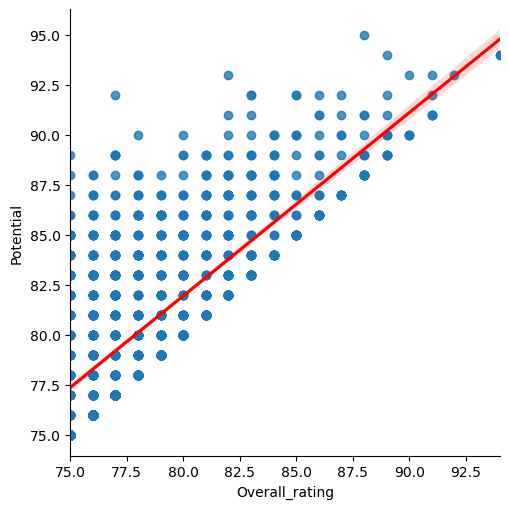

In [626]:
plt.figure(figsize=(5,4))
sns.lmplot(data=df1,x='Overall_rating',y='Potential',line_kws={'color':'red'})
plt.show()

In [628]:
# There is a moderately - strong positive relationship between Overall Rating and Potential
# There exists a linearity between Overall Rating and Potential

## <font color = 'green'>Does skill move have any effect in overall rating.</font>
## <font color = 'green'>Perform the graphical analysis and the statistical analysis.</font>

In [613]:
# Overall_Rating - Ordinal data
# Skill move - Ordinal Data

# Correlation Analysis is done for comparison of two continuous data

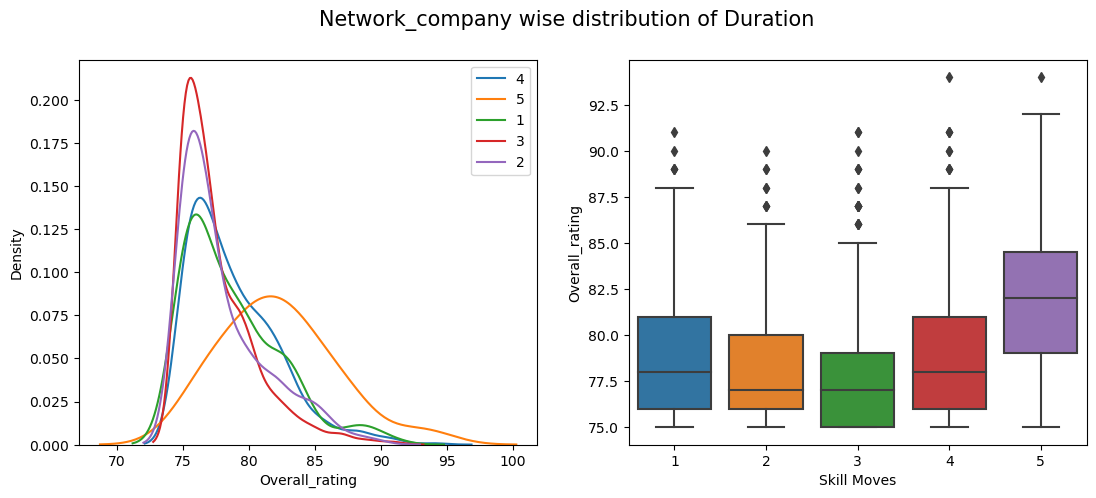

In [651]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
plt.suptitle("Network_company wise distribution of Duration",x=0.5,fontsize=15)
plt.subplot(121)
for i,j in enumerate(df1['Skill Moves'].unique()):
    sns.kdeplot(df1['Overall_rating'][df1['Skill Moves'] == j])
plt.legend(df1['Skill Moves'].unique())

plt.subplot(122)
sns.boxplot(data=df1,x='Skill Moves',y='Overall_rating')
plt.show()

In [615]:
skill_move_1 = df1[df1['Skill Moves'] == 1]['Overall_rating']
skill_move_2 = df1[df1['Skill Moves'] == 2]['Overall_rating']
skill_move_3 = df1[df1['Skill Moves'] == 3]['Overall_rating']
skill_move_4 = df1[df1['Skill Moves'] == 4]['Overall_rating']
skill_move_5 = df1[df1['Skill Moves'] == 5]['Overall_rating']

### `Checking Assumptions of Annova`

### `1) Assumption for Normality`
### `2) Assumption for Equality of population variance`
### Shapiro-wilk test

In [659]:
# H0 : The population is normally distributed
# H1 : The population is not normally distributed

In [657]:
test_stat, p_value = stats.shapiro(df1['Overall_rating'])

Decision = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}
Decision[p_value < 0.05]

'p-value(1.721150444000814e-39) < 0.05, Reject Null hypothesis'

In [652]:
# Checking the Normality Assumptions for each of the skill moves category

shapiro_prob = [stats.shapiro(df1[df1['Skill Moves'] == col]['Overall_rating'])[1] for col in df1['Skill Moves'].unique().tolist()]  

In [656]:
for i in shapiro_prob:
    print({True : "Reject Null hypothesis",False : "Failed to reject Null Hypothesis"}[i < 0.05])

Reject Null hypothesis
Failed to reject Null Hypothesis
Reject Null hypothesis
Reject Null hypothesis
Reject Null hypothesis


### Lavene Test

In [660]:
# H0 : Equality of population variance is equal
# H1 : Equality of population variance is not equal

In [667]:
test_stat,p_value = stats.levene(skill_move_1,skill_move_2,skill_move_3,skill_move_4,skill_move_5)

Decision = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}

Decision[p_value < 0.05]

# Equality of Variance Assumption failed

'p-value(7.467011515280531e-08) < 0.05, Reject Null hypothesis'

### `Assumptions of Annova are failed`

In [669]:
# Parametric test assumptions have failed
# Going for Non-parametric tests

## `Conducting Kruskal-Wallis H Test`

In [ ]:
# H0 : Overall Rating is independent of Skill Moves
# H1 : Overall Rating is not independent of Skill Moves

# Conducting Kruskal-Wallis-H test which is non-parammetric equivalent of 1-way Annova @ 5% significance level
# Location parameter is median unlike mean in case of parametric tests

# if P-value < 0.05, Reject Null hypothesis

In [665]:
test_stat, p_value = stats.kruskal(skill_move_1,skill_move_2,skill_move_3,skill_move_4,skill_move_5)

Decision = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}
Decision[p_value < 0.05]

'p-value(1.4853864620312748e-21) < 0.05, Reject Null hypothesis'

In [ ]:
# There is enough evidence against the null hypothesis that Overall Rating is independent of skill moves

### `There is a influence of Skill Moves on Overall Rating`

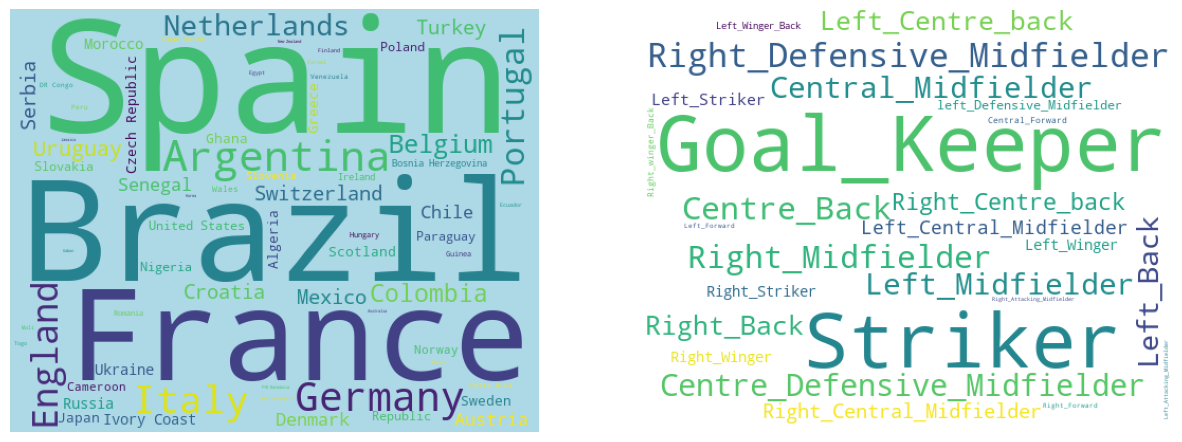

In [720]:
plt.figure(figsize=(15,8))
text1 = " ".join([i for i in df1['Nationality']])
text2= " ".join([i for i in series])
plt.subplot(121)
wordcloud1 = WordCloud(stopwords=STOPWORDS,width=500,background_color='lightblue',height=400,random_state=200).generate(text1)
plt.imshow(wordcloud1)
plt.axis("off")

plt.subplot(122)
wordcloud2 = WordCloud(stopwords=STOPWORDS,width=500,height=400,background_color='white',random_state=200).generate(text2)
plt.imshow(wordcloud2)
plt.axis("off")

plt.show()




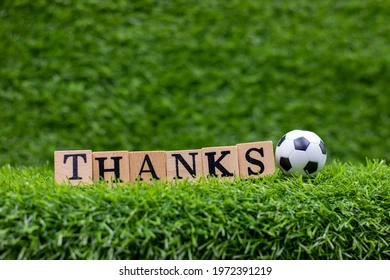




# `Network Dataset`




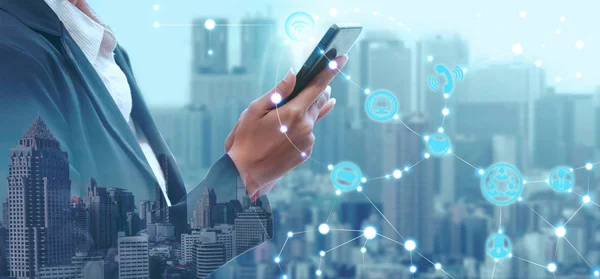


## `Exploratory Data Analysis`

In [110]:
df2 = pd.read_csv('phone.csv')
df2.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [88]:
df2.shape

(820, 6)

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [113]:
# There are no missing values in dataset

missing = df2.isnull().sum().sum()

print(f"Total Missing values : {missing}")

Total Missing values : 0


In [90]:
df2.nunique()

date            738
duration        820
item              3
month             5
network           7
network_type      4
dtype: int64

In [111]:
# Changing the Data type of date column

df2['date'] = pd.to_datetime(df2['date'])

In [114]:
df2.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

Skewness : 0.0058
Kurtosis : -0.1452


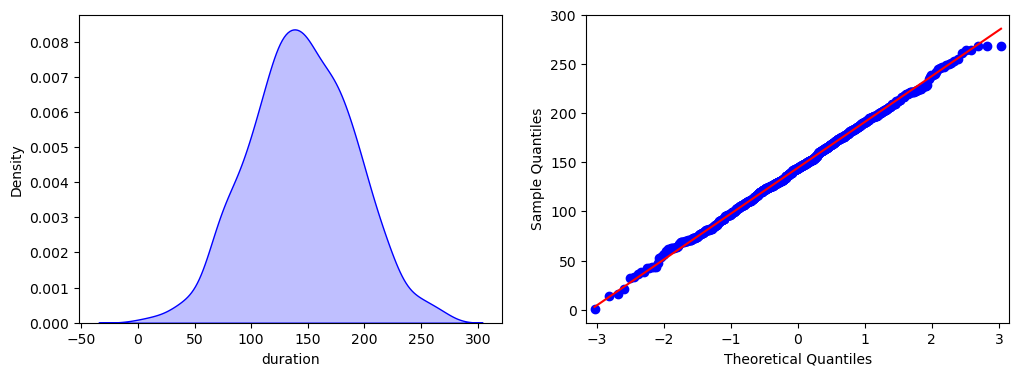

In [386]:
# Analysing the distribution of Duration

print(f"Skewness : {df2['duration'].skew():0.4f}")
print(f"Kurtosis : {df2['duration'].kurt():0.4f}")

from statsmodels.api import qqplot
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    if i == 0:
        sns.kdeplot(df2['duration'],fill=True,color='blue',ax=ax[i])
    else:
        qqplot(df2['duration'],line='q',ax=ax[i])
        plt.show()

In [127]:
df2.item.unique()

array(['data', 'call', 'sms'], dtype=object)

In [128]:
df2.network.unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [129]:
df2.network_type.unique()

array(['data', 'mobile', 'voicemail', 'landline'], dtype=object)

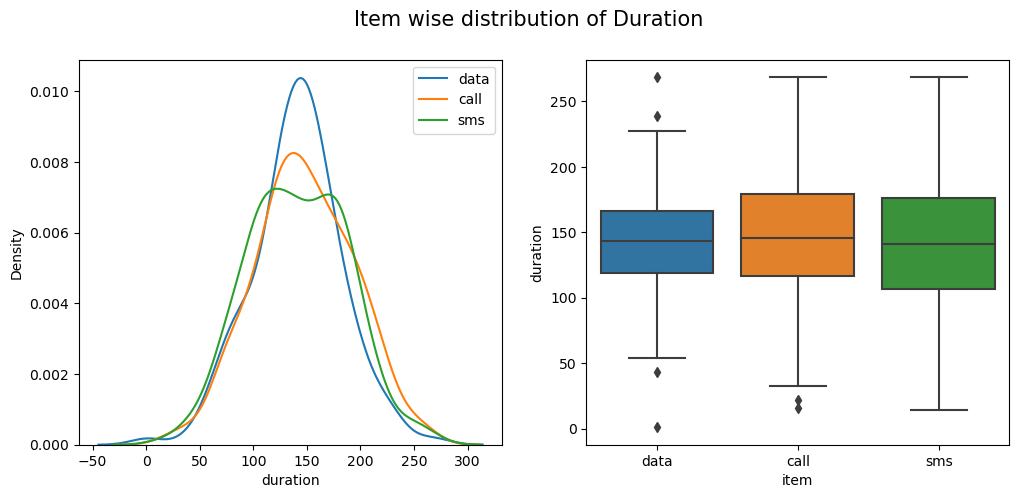

In [416]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
plt.suptitle("Item wise distribution of Duration",x=0.5,fontsize=15)
plt.subplot(121)
for i,j in enumerate(df2.item.unique()):
    sns.kdeplot(df2['duration'][df2['item'] == j])
plt.legend(df2.item.unique())
plt.subplot(122)
sns.boxplot(data=df2,x='item',y='duration')
plt.show()

# Irrespective of 'item', the 

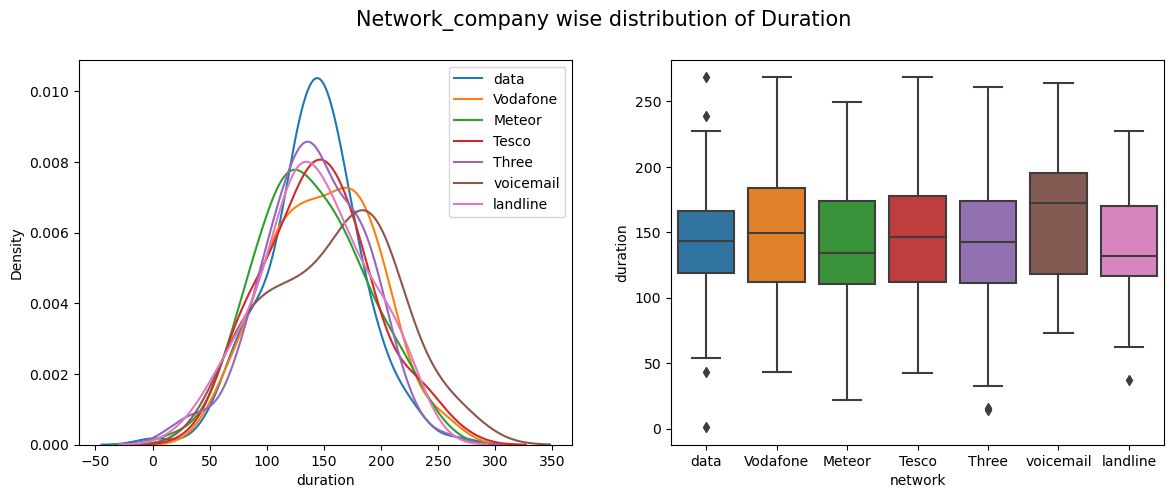

In [418]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle("Network_company wise distribution of Duration",x=0.5,fontsize=15)
plt.subplot(121)
for i,j in enumerate(df2.network.unique()):
    sns.kdeplot(df2['duration'][df2['network'] == j])
plt.legend(df2.network.unique())

plt.subplot(122)
sns.boxplot(data=df2,x='network',y='duration')
plt.show()

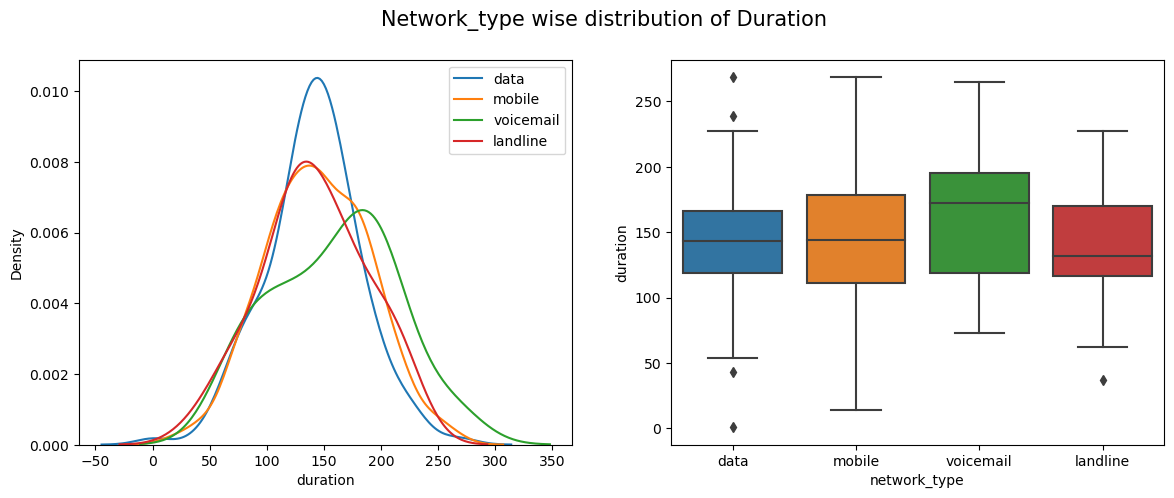

In [419]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle("Network_type wise distribution of Duration",x=0.5,fontsize=15)
plt.subplot(121)
for i,j in enumerate(df2.network_type.unique()):
    sns.kdeplot(df2['duration'][df2['network_type'] == j])
plt.legend(df2.network_type.unique())

plt.subplot(122)
sns.boxplot(data=df2,x='network_type',y='duration')
plt.show()

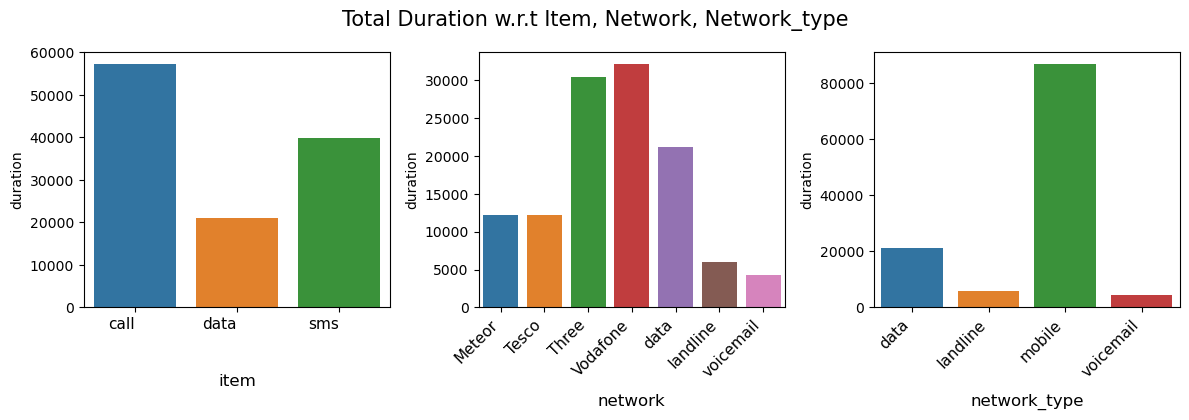

In [134]:
plt.figure(figsize=(12,7))
plt.suptitle("Total Duration w.r.t Item, Network, Network_type",x=0.5,fontsize=15)
for plot_num,category in enumerate(['item','network','network_type']):
    group = df2.groupby(category)['duration'].sum().reset_index()
    rotation = (0 if category == 'item' else 45)
    labelpad = (30 if category == 'item' else 10)
    plt.subplot(2,3,plot_num+1)
    ax = sns.barplot(data=group,x=category,y='duration')
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=rotation,ha='right')
    ax.set_xlabel(ax.get_xlabel(),fontsize=12,labelpad=labelpad)
plt.tight_layout()
plt.show()

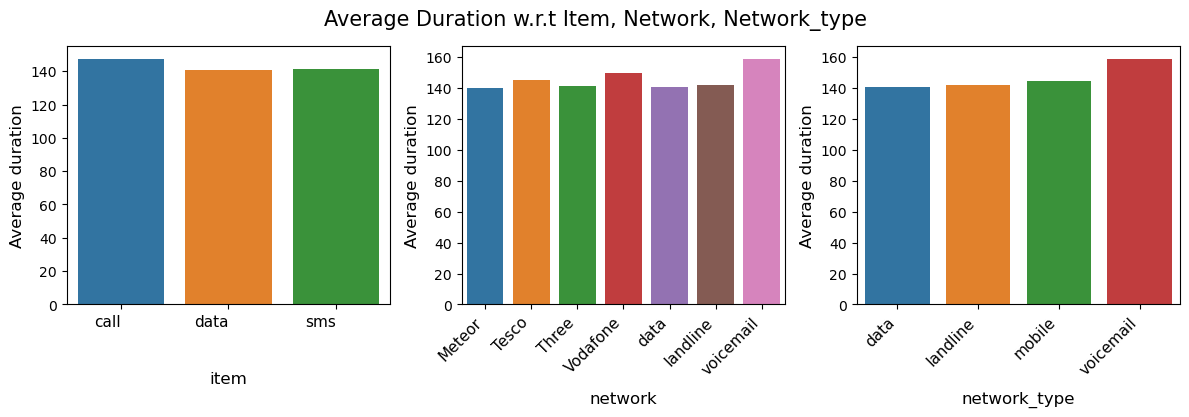

In [146]:
plt.figure(figsize=(12,7))
plt.suptitle("Average Duration w.r.t Item, Network, Network_type",x=0.5,fontsize=15)
for plot_num,category in enumerate(['item','network','network_type']):
    group = df2.groupby(category)['duration'].mean().reset_index()
    rotation = (0 if category == 'item' else 45)
    labelpad = (30 if category == 'item' else 10)
    plt.subplot(2,3,plot_num+1)
    ax = sns.barplot(data=group,x=category,y='duration')
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=rotation,ha='right')
    ax.set_xlabel(ax.get_xlabel(),fontsize=12,labelpad=labelpad)
    ax.set_ylabel("Average "+ax.get_ylabel(),fontsize=12)
plt.tight_layout()
plt.show()

# Hardly not much change incase of Avergae Duration Item wise. 
# 'Voicemail' company in which there is little increase in Average duration 
# 

## <font color = 'green'>a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.</font>

In [268]:
# Creating Dictionary of Mean,Margin of Error(MOE)

network_list = df2['network'].value_counts().index.to_list()
mean_duration = dict()
sem_duration = dict()
for i in network_list:
    mean_duration.update({i:df2[df2['network'] == i]['duration'].mean()})
    sem_duration.update({i:df2[df2['network'] == i]['duration'].sem()})
# sem - Standard Error of mean
# sem - standard_deviation / sqrt(n)

In [269]:
# MOE - Margin of Error corresponding to 95% confidence
MOE = {company : sem_duration[company] * stats.norm.isf(0.05) for company in network_list}

In [261]:
# Dictionary of 95% Confidence interval for Individual company network duration

conf_95 = {company : (round(mean_duration[company] - MOE[company],4),round(mean_duration[company] + MOE[company],4)) 
           for company in network_list}
conf_95

{'Vodafone': (144.3437, 154.8688),
 'Three': (136.4386, 146.4773),
 'data': (135.4062, 146.5311),
 'Meteor': (131.4887, 148.0253),
 'Tesco': (136.8188, 153.7562),
 'landline': (129.8719, 153.3634),
 'voicemail': (142.0328, 176.1149)}

In [262]:
# Margin of Error corresponding to 99% confidence
MOE = {company : sem_duration[company] * stats.norm.isf(0.01) for company in network_list}

In [270]:
# Dictionary of 95% Confidence interval for Individual company network duration
conf_99 = {company : (round(mean_duration[company] - MOE[company],4),round(mean_duration[company] + MOE[company],4)) 
           for company in network_list}
conf_99

{'Vodafone': (144.3437, 154.8688),
 'Three': (136.4386, 146.4773),
 'data': (135.4062, 146.5311),
 'Meteor': (131.4887, 148.0253),
 'Tesco': (136.8188, 153.7562),
 'landline': (129.8719, 153.3634),
 'voicemail': (142.0328, 176.1149)}

### `99% confidence intervals is wider than 95% confidence intervals`
### `As the confidence level increases Interval widens`
### `More chance of observing a mean in the interval`

## <font color = 'green'>Perform statistical analysis to check whether the networks are equally distributed in the dataset.</font>

## `Chi-square test for goodness of fit`

In [313]:
# H0: There is no difference between Observed and Expected frequencies
# H1: There is difference between Observed and Expected frequencies

# conducting chi-square test for goodness of fit@ 5% significance

In [293]:
# Array of observed distribution
Observed = (df2['network'].value_counts(normalize=True)*100).round(2).values

# Array of equal distribution
expected = np.array([100/len(df2['network'].value_counts(normalize=True))]*len(Observed))

# Degrees of freedom
df = len(Observed) - 1

In [290]:
chi_stat, p_value = stats.chisquare(Observed,expected)

Fit = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}

Fit[p_value < 0.05]

'p-value(1.4080461430547252e-06) < 0.05, Reject Null hypothesis'

In [666]:
# There is enough evidence in the favour of Alternate hypothesis Networks are not equally distributed

### `So networks are not equally distributed.`

## <font color = 'green'>Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph. </font>

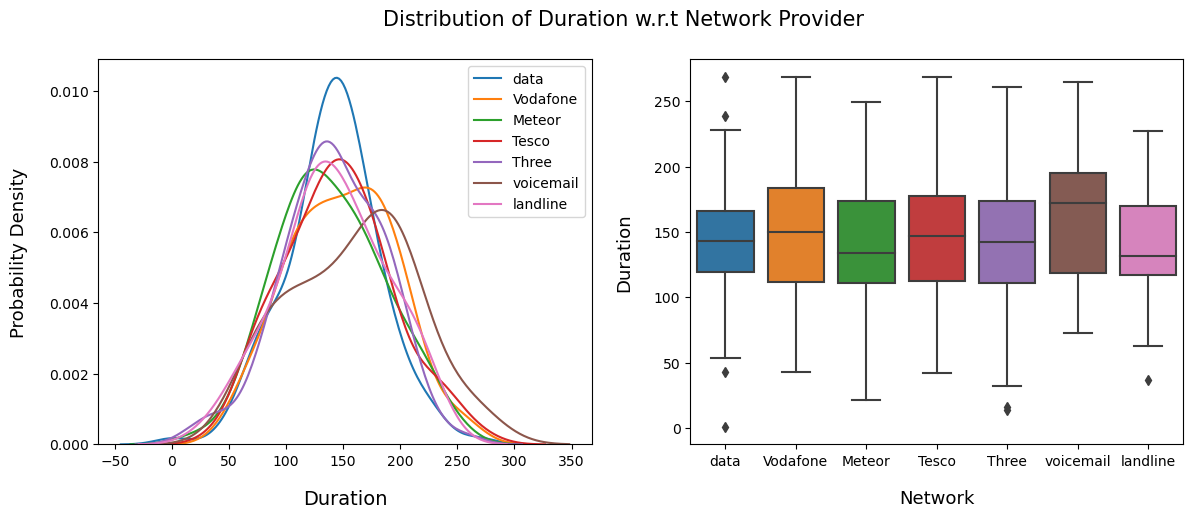

In [324]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle("Distribution of Duration w.r.t Network Provider",x=0.5,fontsize=15)
plt.subplot(121)
for i,j in enumerate(df2.network.unique()):
    sns.kdeplot(df2['duration'][df2['network'] == j])
plt.xlabel("Duration",fontsize=14,labelpad=15)
plt.ylabel("Probability Density",fontsize=13,labelpad=15)
plt.legend(df2.network.unique())

plt.subplot(122)
sns.boxplot(data=df2,x='network',y='duration')
plt.xlabel("Network",fontsize=13,labelpad=15)
plt.ylabel("Duration",fontsize=13,labelpad=15)
plt.show()

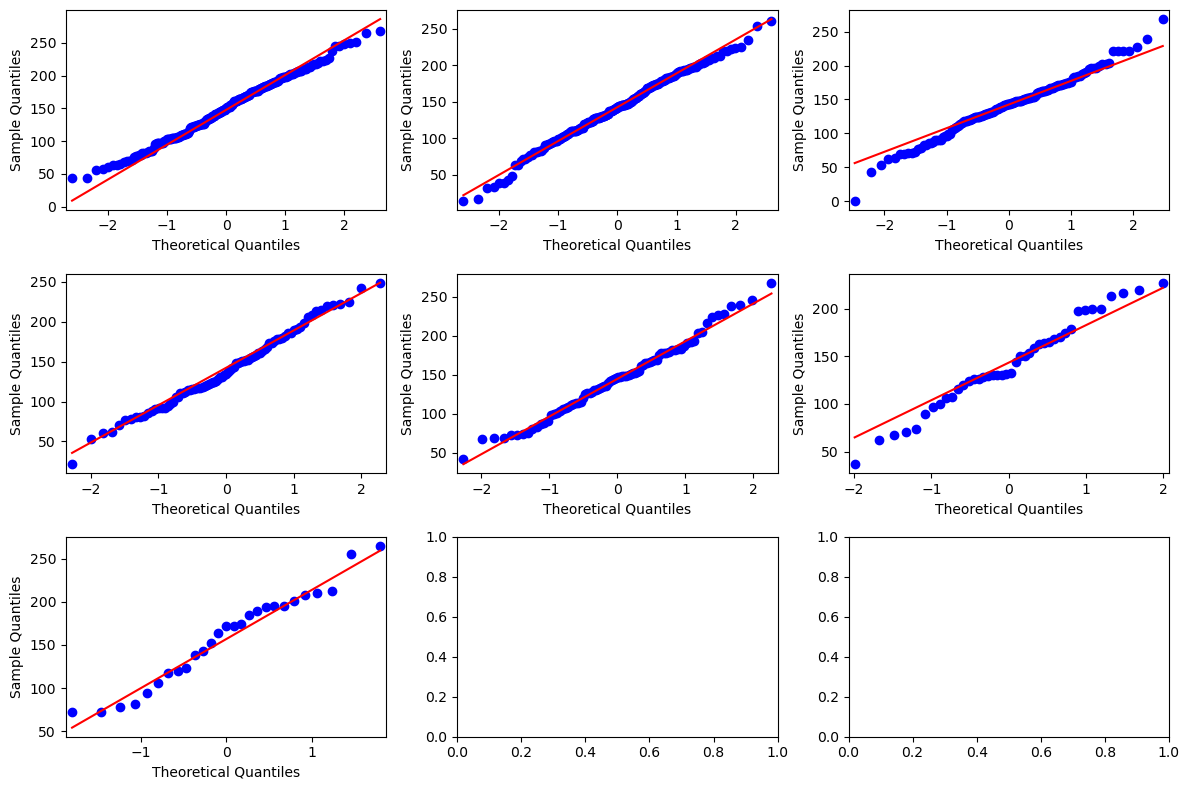

In [779]:
fig,ax = plt.subplots(3,3,figsize=(12,8))
from statsmodels.api import qqplot
p,q = 0,0
for i,j in enumerate(network_list,start=1):
    plot = qqplot(df2[df2['network'] == j]['duration'],line='q',ax=ax[p][q])
    q+=1
    if q % 3 == 0:
        p,q = p+1,0
plt.tight_layout()
plt.show()

In [442]:
print("categories in network -",network_list)
skew = {attribute : df2[df2['network'] == attribute]['duration'].skew().round(5) for attribute in network_list}
kurt = {attribute : df2[df2['network'] == attribute]['duration'].kurt().round(5) for attribute in network_list}

categories in network - ['Vodafone', 'Three', 'data', 'Meteor', 'Tesco', 'landline', 'voicemail']


In [431]:
skew_kurt = pd.DataFrame({'Skewness':skew,'Kurtosis':kurt})
skew_kurt

,Skewness,Kurtosis
Vodafone,0.03132,-0.49595
Three,-0.21229,0.07368
data,-0.11008,0.70000
Meteor,0.15758,-0.34107
Tesco,0.24617,-0.19174
landline,-0.08992,-0.43767
voicemail,-0.03603,-0.73916


In [443]:
# from Box plot and KDE plot.
# The data is high peak compared to others and has outliers.
# The voice mail is having low peak compared to others, mean is more compared to others.
# Network 'Three' and 'Landline' have some outliers to the left of the distribution

## <font color = 'green'>Perform statistical tests to identify the relation between item and duration.</font>
## <font color = 'green'>Detailed explanation of relation between the classes is required.</font>

In [472]:
print("Categories in item -",df2['item'].unique().tolist())

Categories in item - ['data', 'call', 'sms']


## `One-way Annova @ 5% significance level`

### **[1) Assumption for Normality](#shapiro)** 
### **[2) Assumption for Equality of population variance](#levene)** 

<a id = "shapiro"> </a>
### Shapiro-wilk test

In [499]:
# Shapiro-wilk test
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

# H0: Data is normally distributed
# Ha: Data is not normally distributed

In [453]:
data = df2[df2['item'] == 'data']['duration']
call = df2[df2['item'] == 'call']['duration']
sms = df2[df2['item'] == 'sms']['duration']

In [465]:
test_stat,p_value1 = stats.shapiro(data)
test_stat,p_value2 = stats.shapiro(call)
test_stat,p_value3 = stats.shapiro(sms)

In [496]:
Normality = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value1,p_value2,p_value3}) > 0.05, Failed to reject Null hypothesis"}
Normality[(p_value1 < 0.05) & (p_value2 < 0.05) & (p_value3 < 0.05)]

# Normality Assumption is satisfied

'p-value((0.48521795868873596, 0.7803382277488708, 0.37839275598526)) > 0.05, Failed to reject Null hypothesis'

<a id = "levene"> </a>
### Levene Test

In [500]:
# Levene Test

# H0: The variances are equal
# Ha: The variances are not equal

In [470]:
test_stat,p_value = stats.levene(data,call,sms)

Eq_variance = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}
Eq_variance[p_value < 0.05]

'p-value(0.03285087780533987) < 0.05, Reject Null hypothesis'

In [483]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [486]:
pairwise_tukeyhsd(df2['duration'],df2['item']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
call,data,-6.6347,0.2862,-16.9372,3.6678,False
call,sms,-6.0621,0.207,-14.4472,2.323,False
data,sms,0.5726,0.9,-10.2563,11.4015,False


## <font color = 'green'>Perform statistical tests to identify the relation between network and network_type</font>. 

In [503]:
network_analysis = pd.crosstab(df2['network'],df2['network_type'])
network_analysis

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


## `Performing chi-square test for independence`

In [675]:
# Testing Chi_square test for independence @ 5% significance level

# H0 : Network_provider and Network_type are independent
# H1 : Network_provider and Network_type not independent

# p_value < 0.05, Reject Null hypothesis

In [674]:
test_stat,p_value,dof,contingency = stats.chi2_contingency(network_analysis,correction=False)

chi_ind = {True : f"p-value({p_value}) < 0.05, Reject Null hypothesis",
            False : f"p-value({p_value}) > 0.05, Failed to reject Null hypothesis"}
chi_ind[p_value < 0.05]

'p-value(0.0) < 0.05, Reject Null hypothesis'

In [676]:
# There is enough evidence against the Null hypothesis that Network_provider and Network_type are independent

### `Network_provider and Network_type are dependent`




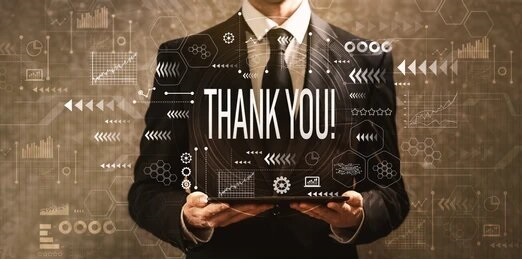